In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, average_precision_score, confusion_matrix, balanced_accuracy_score
import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
# !pwd

In [3]:
df = pd.read_csv('/home/prateek/sk_courses/research/subgraph_data.csv')


In [4]:
df.head(10)

,index,number_of_triangles,number_of_nodes,number_of_edges,candidate_katz_centrality,candidate_pagerank,subgraph_largest_clique_size,shortest_path_lengths,mean_shortest_path_length,sitelinks,outcoming_links,incoming_links,candidate_eigenvector_centrality,candidate_clustering
0,826,168,9,10,0.395319,0.211180,3,16,4,1938.0,740142.0,549690.0,0.455799,0.222222
1,2821,0,2,3,0.707107,0.500000,1,2,2,1228.0,656494.0,209615.0,0.000000,0.000000
2,219,0,2,3,0.707107,0.500000,1,2,2,NaN,NaN,NaN,0.000000,0.000000
3,293,2,3,4,0.577350,0.333333,1,4,2,0.0,274.0,84.0,0.000000,0.000000
4,747,2,3,4,0.577350,0.333333,1,4,2,0.0,351.0,7.0,0.000000,0.000000
5,1221,330,11,12,0.371761,0.189705,3,24,4,12008.0,5116892.0,5339291.0,0.475604,0.160000
6,811,2,3,4,0.577350,0.333333,1,4,2,NaN,NaN,NaN,0.000000,0.000000
7,1536,2,3,4,0.577350,0.333333,1,4,2,0.0,274.0,84.0,0.000000,0.000000
8,1032,2,3,4,0.577350,0.333333,1,4,2,0.0,351.0,7.0,0.000000,0.000000
9,520,20,5,6,0.515362,0.455000,3,11,2,56957.0,NaN,NaN,0.000000,0.200000


In [5]:
df.columns

Index(['index', 'number_of_triangles', 'number_of_nodes', 'number_of_edges',
       'candidate_katz_centrality', 'candidate_pagerank',
       'subgraph_largest_clique_size', 'shortest_path_lengths',
       'mean_shortest_path_length', 'sitelinks', 'outcoming_links',
       'incoming_links', 'candidate_eigenvector_centrality',
       'candidate_clustering'],
      dtype='object')

In [6]:
df.shape

(2822, 14)

In [7]:
df.describe()

,index,number_of_triangles,number_of_nodes,number_of_edges,candidate_katz_centrality,candidate_pagerank,subgraph_largest_clique_size,shortest_path_lengths,mean_shortest_path_length,sitelinks,outcoming_links,incoming_links,candidate_eigenvector_centrality,candidate_clustering
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2372.000000,1.823000e+03,1.745000e+03,2822.000000,2822.000000
mean,1410.500000,18.581148,3.736712,4.736712,0.552834,0.330549,1.653083,5.553154,2.298724,30601.157673,8.901119e+05,5.151907e+05,0.065915,0.075779
std,814.785555,53.006400,1.783712,1.783712,0.092155,0.123187,0.797765,4.185758,0.644332,94923.310828,1.944840e+06,1.424367e+06,0.177234,0.238243
min,0.000000,0.000000,2.000000,3.000000,0.200377,0.014572,1.000000,2.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,705.250000,2.000000,3.000000,4.000000,0.515733,0.275393,1.000000,4.000000,2.000000,0.000000,3.510000e+02,7.000000e+00,0.000000,0.000000
50%,1410.500000,2.000000,3.000000,4.000000,0.577350,0.333333,1.000000,4.000000,2.000000,44.000000,8.410000e+03,2.445000e+03,0.000000,0.000000
75%,2115.750000,8.000000,4.000000,5.000000,0.577350,0.400545,2.000000,5.000000,2.000000,6809.000000,5.055530e+05,1.908280e+05,0.000000,0.000000
max,2821.000000,572.000000,13.000000,14.000000,0.739940,0.649123,5.000000,54.000000,9.000000,603501.000000,1.045613e+07,8.768538e+06,0.816497,1.000000


<AxesSubplot:ylabel='Frequency'>

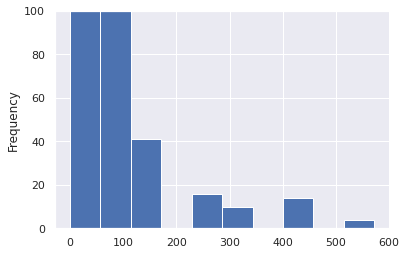

In [8]:
df['number_of_triangles'].plot.hist(ylim=(0,100))

<AxesSubplot:ylabel='Frequency'>

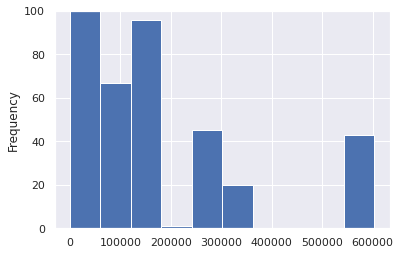

In [9]:
df['sitelinks'].plot.hist(ylim=(0,100))

In [10]:
df = df.set_index('index')

In [11]:
metas = pd.read_csv('/home/prateek/sk_courses/research/metas.csv')

In [12]:
data = pd.merge(metas, df, left_index=True, right_index=True)

In [13]:
data = data.sort_values('idx')

In [14]:
data['label'] = (data['candidate_id'] == data['target_id'])

In [15]:
data['label'] = data['label'].astype(int)

In [16]:
data.head()

,idx,original_question,ner_question,question_entity_id,question_entity_text,question_entity_scores,candidate_id,candidate_text,target_id,target_text,...,candidate_pagerank,subgraph_largest_clique_size,shortest_path_lengths,mean_shortest_path_length,sitelinks,outcoming_links,incoming_links,candidate_eigenvector_centrality,candidate_clustering,label
2449,0,Where did roger marquis die\n,Where Did [START] Roger Marquis [END] Die\n,"['Q7358590', 'Q6598240']","['Roger Marquis', 'List of Star Trek character...","[-0.16557979583740234, -3.4536736011505127]",Q1637790,Holyoke,Q1637790,Holyoke,...,0.500000,1,2,2,0.0,25.0,0.0,0.0,0.0,1
2215,1,Where did roger marquis die\n,Where Did [START] Roger Marquis [END] Die\n,"['Q7358590', 'Q6598240']","['Roger Marquis', 'List of Star Trek character...","[-0.16557979583740234, -3.4536736011505127]",Q1297,Chicago,Q1637790,Holyoke,...,0.333333,1,4,2,0.0,351.0,7.0,0.0,0.0,0
289,2,Where did roger marquis die\n,Where Did [START] Roger Marquis [END] Die\n,"['Q7358590', 'Q6598240']","['Roger Marquis', 'List of Star Trek character...","[-0.16557979583740234, -3.4536736011505127]",Q236339,False,Q1637790,Holyoke,...,0.333333,1,4,2,0.0,26.0,1.0,0.0,0.0,0
361,3,Where did roger marquis die\n,Where Did [START] Roger Marquis [END] Die\n,"['Q7358590', 'Q6598240']","['Roger Marquis', 'List of Star Trek character...","[-0.16557979583740234, -3.4536736011505127]",Q84,London,Q1637790,Holyoke,...,0.098514,2,17,4,22521.0,NaN,NaN,0.0,0.0,0
1914,4,Where did roger marquis die\n,Where Did [START] Roger Marquis [END] Die\n,"['Q7358590', 'Q6598240']","['Roger Marquis', 'List of Star Trek character...","[-0.16557979583740234, -3.4536736011505127]",Q65,Los Angeles,Q1637790,Holyoke,...,0.069768,2,4,2,NaN,NaN,NaN,0.0,0.0,0


In [17]:
data.isnull().sum(axis = 0)

idx                                    0
original_question                      0
ner_question                           0
question_entity_id                     0
question_entity_text                   0
question_entity_scores                 0
candidate_id                         450
candidate_text                         0
target_id                            137
target_text                            0
shortest_paths                         0
number_of_triangles                    0
number_of_nodes                        0
number_of_edges                        0
candidate_katz_centrality              0
candidate_pagerank                     0
subgraph_largest_clique_size           0
shortest_path_lengths                  0
mean_shortest_path_length              0
sitelinks                            450
outcoming_links                      999
incoming_links                      1077
candidate_eigenvector_centrality       0
candidate_clustering                   0
label           

In [18]:
data.isin([0]).sum(axis=0)

idx                                    1
original_question                      0
ner_question                           0
question_entity_id                     0
question_entity_text                   0
question_entity_scores                 0
candidate_id                           0
candidate_text                         0
target_id                              0
target_text                            0
shortest_paths                         0
number_of_triangles                  334
number_of_nodes                        0
number_of_edges                        0
candidate_katz_centrality              0
candidate_pagerank                     0
subgraph_largest_clique_size           0
shortest_path_lengths                  0
mean_shortest_path_length              0
sitelinks                            762
outcoming_links                        1
incoming_links                       122
candidate_eigenvector_centrality    2451
candidate_clustering                2499
label           

In [19]:
numeric_features = data[['number_of_triangles', 'number_of_nodes' ,'number_of_edges' ,'candidate_katz_centrality', 'candidate_pagerank', 'subgraph_largest_clique_size', 'shortest_path_lengths', 'mean_shortest_path_length', 'sitelinks', 'outcoming_links', 'incoming_links', 'candidate_eigenvector_centrality', 'candidate_clustering', 'label']]

In [20]:
numeric_features.shape

(2822, 14)

In [21]:
numeric_features = numeric_features.dropna()

In [22]:
numeric_features.shape

(1680, 14)

In [23]:
from pyod.models.knn import KNN
KNN_model = KNN()
KNN_model.fit(numeric_features)
outlier_labels = KNN_model.labels_
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)
outliers = numeric_features.iloc[outlier_labels == 1]

168


In [24]:
drop_df = pd.merge(numeric_features, outliers, how='outer', indicator=True)
features = drop_df.loc[drop_df._merge == 'left_only']

In [25]:
features = features.drop('_merge', axis = 1)

In [26]:
import matplotlib.pyplot as plt

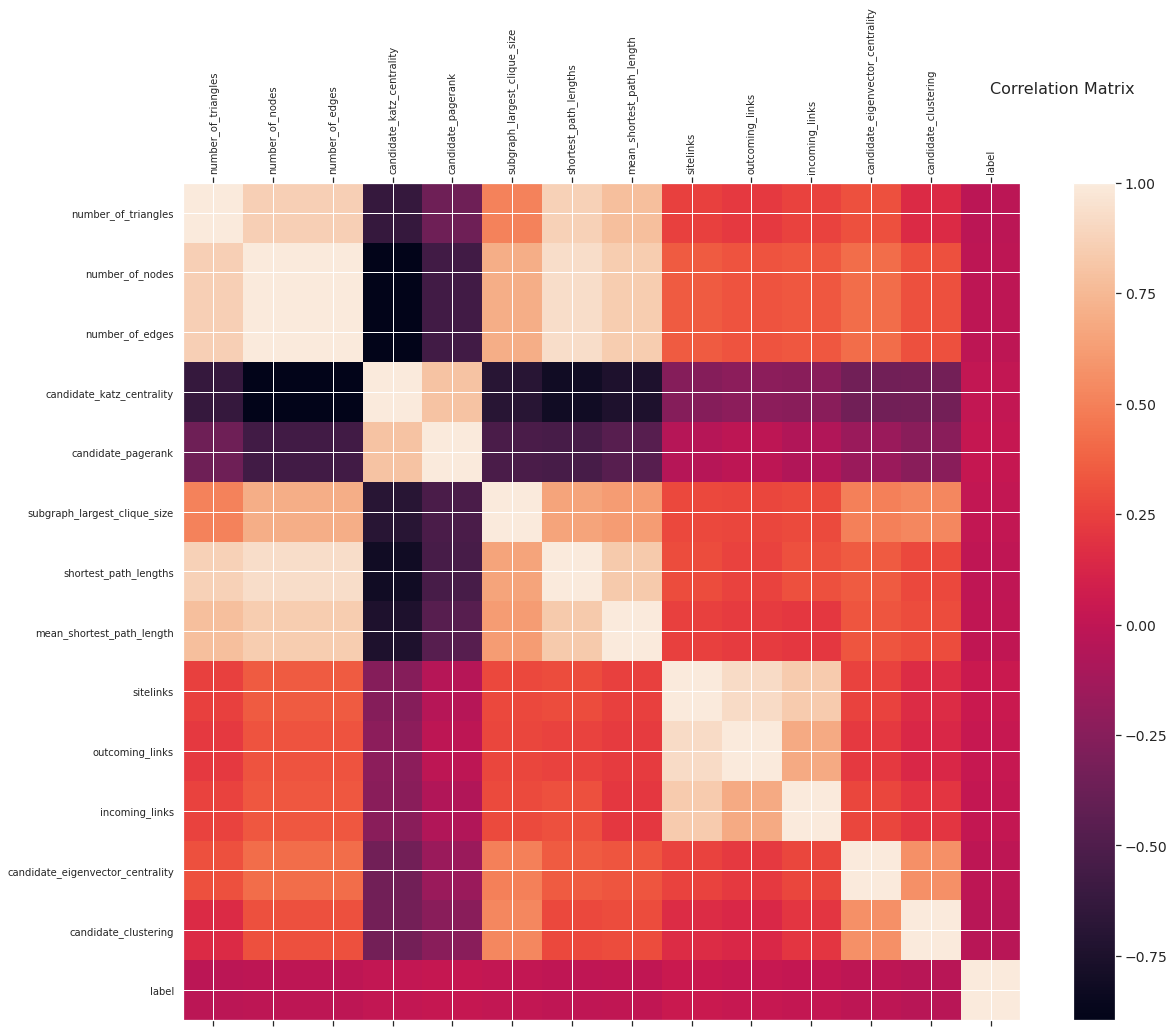

In [27]:
f = plt.figure(figsize=(19, 15))
plt.matshow(features.corr(), fignum=f.number)
plt.xticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, x=1.05, y=1.1);

In [28]:
corr = features.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,number_of_triangles,number_of_nodes,number_of_edges,candidate_katz_centrality,candidate_pagerank,subgraph_largest_clique_size,shortest_path_lengths,mean_shortest_path_length,sitelinks,outcoming_links,incoming_links,candidate_eigenvector_centrality,candidate_clustering,label
number_of_triangles,1.00,0.86,0.86,-0.63,-0.36,0.51,0.87,0.78,0.25,0.22,0.26,0.31,0.15,-0.02
number_of_nodes,0.86,1.00,1.00,-0.89,-0.57,0.70,0.93,0.85,0.35,0.33,0.34,0.42,0.31,-0.01
number_of_edges,0.86,1.00,1.00,-0.89,-0.57,0.70,0.93,0.85,0.35,0.33,0.34,0.42,0.31,-0.01
candidate_katz_centrality,-0.63,-0.89,-0.89,1.00,0.81,-0.69,-0.81,-0.74,-0.25,-0.23,-0.24,-0.34,-0.33,0.02
candidate_pagerank,-0.36,-0.57,-0.57,0.81,1.00,-0.52,-0.53,-0.46,-0.04,-0.01,-0.06,-0.16,-0.24,0.03
subgraph_largest_clique_size,0.51,0.70,0.70,-0.69,-0.52,1.00,0.65,0.62,0.28,0.27,0.29,0.50,0.53,0.01
shortest_path_lengths,0.87,0.93,0.93,-0.81,-0.53,0.65,1.00,0.84,0.29,0.26,0.31,0.35,0.28,-0.01
mean_shortest_path_length,0.78,0.85,0.85,-0.74,-0.46,0.62,0.84,1.00,0.25,0.23,0.21,0.33,0.30,0.01
sitelinks,0.25,0.35,0.35,-0.25,-0.04,0.28,0.29,0.25,1.00,0.92,0.84,0.25,0.16,0.05
outcoming_links,0.22,0.33,0.33,-0.23,-0.01,0.27,0.26,0.23,0.92,1.00,0.68,0.22,0.14,0.04


In [56]:
y_try = features['label']
X_try = features.drop('label', axis = 1)

X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_try, y_try, test_size=0.30,random_state=314, shuffle=False, stratify=None)

scaler = MinMaxScaler()
scaler.fit(X_train_try)

X_train_try = scaler.transform(X_train_try)
X_test_try = scaler.transform(X_test_try)

In [57]:
xgboost = XGBClassifier()
xgboost.fit(X_train_try, y_train_try)
y_pred = xgboost.predict(X_test_try)
f1 = f1_score(y_pred, y_test_try, average='weighted')
print('F1 score: {}'.format(f1))

F1 score: 0.8245266388512236


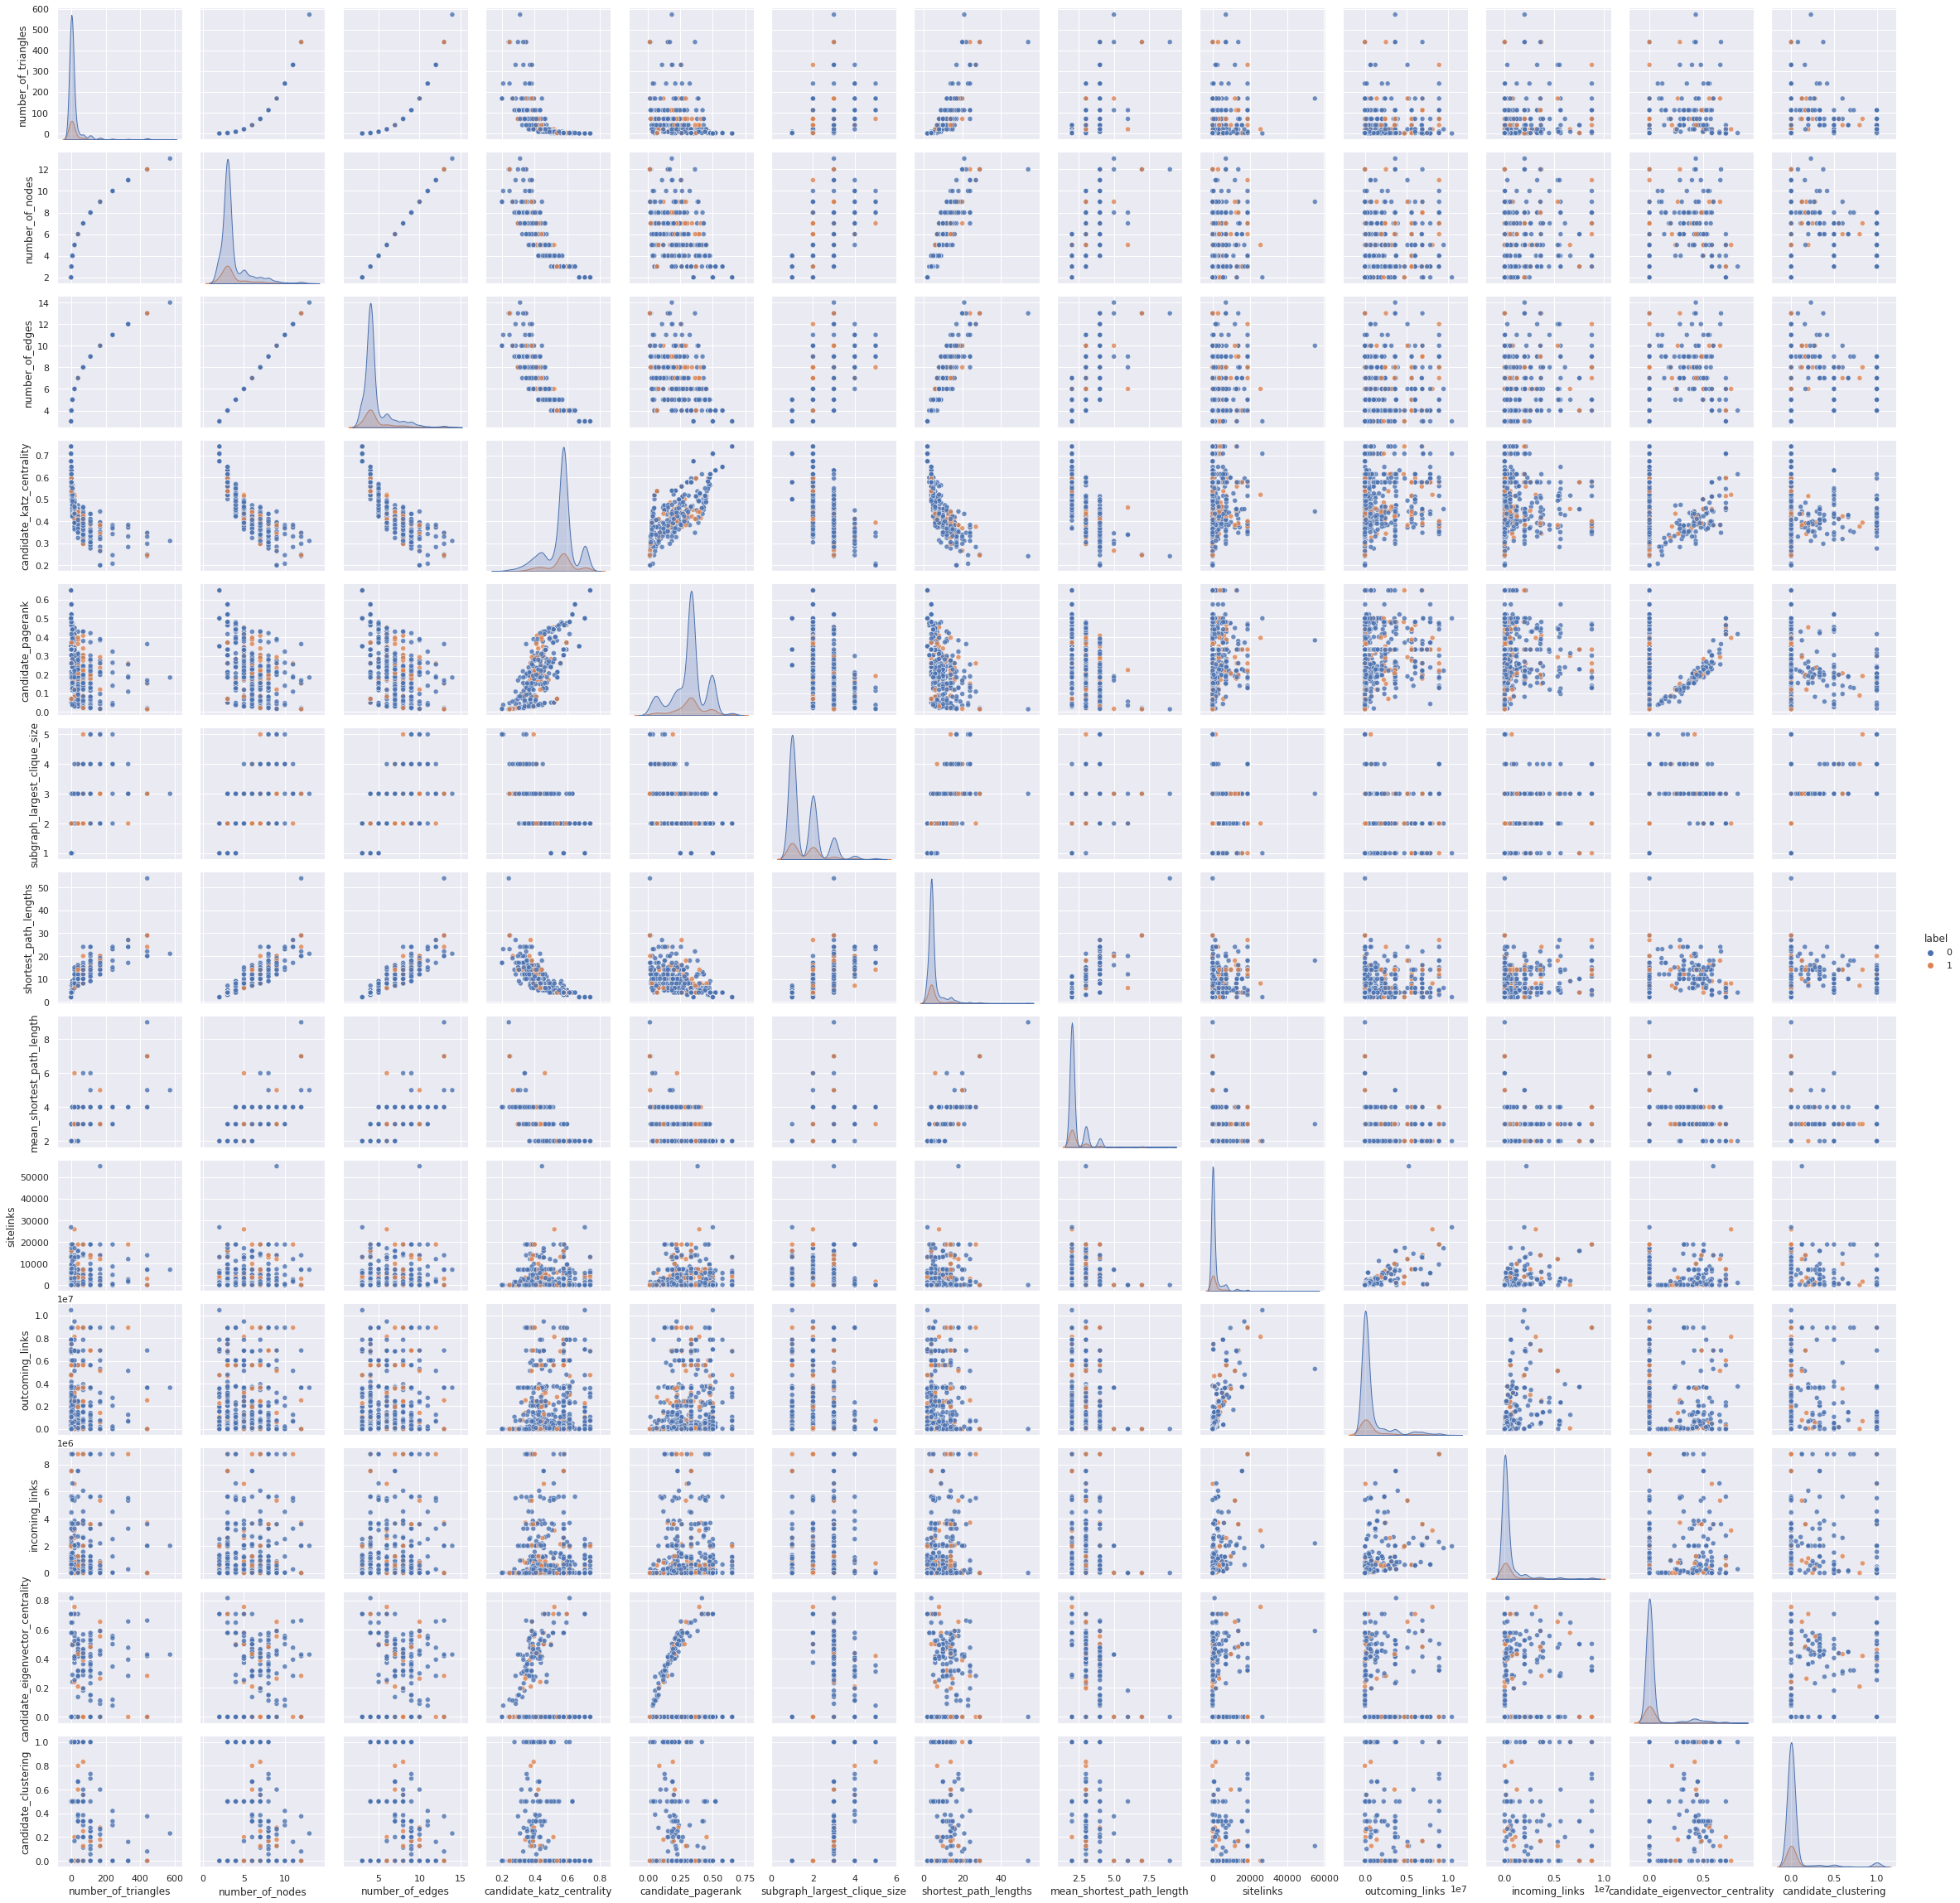

In [31]:
sns.pairplot(numeric_features, hue='label', kind = 'scatter', plot_kws=dict(alpha=0.8))
plt.show()

In [32]:
from sklearn.utils.class_weight import compute_sample_weight

In [62]:
def train(clf_dict, X, y):
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=314, shuffle=True, stratify=y_try)
    
#     scaler = MinMaxScaler()
#     scaler.fit(X_train)

#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
    
    sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train)


    clf = next(iter(clf_dict))
    params_grid = next(iter(clf_dict.items()))[1]

    if clf == "KNeighborsClassifier":

        clf = KNeighborsClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1 = round(f1_score(y_test, y_pred, average='weighted',), 2)
        b_score = balanced_accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

    elif clf == "RandomForestClassifier":

        clf = RandomForestClassifier()
        clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = clf.predict(X_test)
        f1 = round(f1_score(y_test, y_pred, average='weighted',), 2)
        b_score = balanced_accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

    elif clf == "LogisticRegression":
        
        clf = LogisticRegression(penalty='l2', max_iter=5000)
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = clf.predict(X_test)
        f1 = round(f1_score(y_test, y_pred, average='weighted',), 2)
        b_score = balanced_accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

    else:
        
        clf = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1)
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = clf.predict(X_test)
        f1 = round(f1_score(y_test, y_pred, average='weighted',), 2)
        b_score = balanced_accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

    return clf, y_pred, f1, b_score, cm 

In [63]:
def grid_search(clf_dict, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=314, shuffle=True, stratify=y_try)

    cv = KFold(n_splits=5, shuffle=True, random_state=5)

    clf = next(iter(clf_dict))
    params_grid = next(iter(clf_dict.items()))[1]

    if clf == "KNeighborsClassifier":
        
        clf = KNeighborsClassifier()

        gs =  GridSearchCV(clf, param_grid=params_grid, cv=cv, scoring='f1')

        gs.fit(X_train, y_train)
    
    elif clf == "RandomForestClassifier":
        
        clf = RandomForestClassifier()
       
        sample_weights = compute_sample_weight(
        class_weight='balanced',
        y=y_train)        

        gs =  GridSearchCV(clf, param_grid=params_grid, cv=cv, scoring='f1')

        gs.fit(X_train, y_train, sample_weight=sample_weights)

    elif clf == "LogisticRegression":
        
        clf = LogisticRegression(penalty='l2', max_iter=5000)
        
        sample_weights = compute_sample_weight(
        class_weight='balanced',
        y=y_train)        

        gs =  GridSearchCV(clf, param_grid=params_grid, cv=cv, scoring='f1')

        gs.fit(X_train, y_train, sample_weight=sample_weights)

    else:
        
        clf = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, nthread=4)
        
        sample_weights = compute_sample_weight(
        class_weight='balanced',
        y=y_train)        
        

        gs =  GridSearchCV(clf, param_grid=params_grid, cv=cv, scoring='f1')

        gs.fit(X_train, y_train, sample_weight=sample_weights)        

    return gs.best_params_

In [64]:
clfs_dict = {'KNeighborsClassifier': {'n_neighbors': range(3, 17, 2)},
        'RandomForestClassifier': {'n_estimators':range(1, 15, 1), 'max_features':range(1, 16, 1)},
        'LogisticRegression': {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'max_iter': [5000]},
        'XGBClassifier': {'max_depth': range(2, 10, 1), 'alpha': range(1, 10, 1), 'n_estimators': range(60, 220, 40), 'learning_rate': [0.1, 0.01, 0.05]}}

In [65]:
for key, value in clfs_dict.items():
  parse_dict = {key: value}
  _, _, f1, b_score, _= train(parse_dict, X_try, y_try)
  print("F1 score for {} = {}, Balanced_Accuracy = {}".format(key, f1, b_score))

F1 score for KNeighborsClassifier = 0.76, Balanced_Accuracy = 0.4991877842755036
F1 score for RandomForestClassifier = 0.75, Balanced_Accuracy = 0.50909681611436
F1 score for LogisticRegression = 0.76, Balanced_Accuracy = 0.5214424951267056
F1 score for XGBClassifier = 0.77, Balanced_Accuracy = 0.5322080453659401


In [66]:
optimal_p = []
for key, value in clfs_dict.items():
  parse_dict1 = {key: value}
  optim_params = grid_search(parse_dict1, X_try, y_try)
  parse_dict2 = {key: optim_params}
  optimal_p.append(parse_dict2)
  _, _, f1, b_score, _ = train(parse_dict2, X_try, y_try)
  print("F1 score for {} = {}, Balanced_Accuracy = {}".format(key, f1, b_score))

F1 score for KNeighborsClassifier = 0.76, Balanced_Accuracy = 0.4991877842755036


/home/prateek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 1050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/home/prateek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/prateek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/home/prateek/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1085, in __call__
    

F1 score for RandomForestClassifier = 0.76, Balanced_Accuracy = 0.5176620001181405
F1 score for LogisticRegression = 0.75, Balanced_Accuracy = 0.514073483371729
F1 score for XGBClassifier = 0.75, Balanced_Accuracy = 0.5055082993679485


In [67]:
features.head()

,number_of_triangles,number_of_nodes,number_of_edges,candidate_katz_centrality,candidate_pagerank,subgraph_largest_clique_size,shortest_path_lengths,mean_shortest_path_length,sitelinks,outcoming_links,incoming_links,candidate_eigenvector_centrality,candidate_clustering,label
0,0,2,3,0.707107,0.500000,1,2,2,0.0,25.0,0.0,0.0,0.0,1
1,2,3,4,0.577350,0.333333,1,4,2,0.0,351.0,7.0,0.0,0.0,0
2,2,3,4,0.577350,0.333333,1,4,2,0.0,351.0,7.0,0.0,0.0,0
3,2,3,4,0.577350,0.333333,1,4,2,0.0,351.0,7.0,0.0,0.0,0
4,2,3,4,0.577350,0.333333,1,4,2,0.0,351.0,7.0,0.0,0.0,0


In [68]:
features['nodes_edges'] = features['number_of_nodes']*features['number_of_edges']
features['links'] = features['sitelinks'] + features['outcoming_links'] + features['incoming_links']

In [69]:
features = features.drop(['number_of_nodes', 'number_of_edges', 'sitelinks', 'outcoming_links', 'incoming_links'], axis=1)

In [73]:
features.head()

,number_of_triangles,candidate_katz_centrality,candidate_pagerank,subgraph_largest_clique_size,shortest_path_lengths,mean_shortest_path_length,candidate_eigenvector_centrality,candidate_clustering,label,nodes_edges,links
0,0,0.707107,0.500000,1,2,2,0.0,0.0,1,6,25.0
1,2,0.577350,0.333333,1,4,2,0.0,0.0,0,12,358.0
2,2,0.577350,0.333333,1,4,2,0.0,0.0,0,12,358.0
3,2,0.577350,0.333333,1,4,2,0.0,0.0,0,12,358.0
4,2,0.577350,0.333333,1,4,2,0.0,0.0,0,12,358.0


In [77]:
y_new = features['label']
X_new = features.drop('label', axis = 1)

In [78]:
clfs = []
confusion_matrices = []
for key, value in clfs_dict.items():
  parse_dict = {key: value}
  clf, _, f1, b_score, cm = train(parse_dict, X_new, y_new)
  clfs.append(clf)
  confusion_matrices.append(cm)
  print("F1 score for {} = {}, Balanced_Accuracy = {}".format(key, f1, b_score))

F1 score for KNeighborsClassifier = 0.76, Balanced_Accuracy = 0.4967954397778959
F1 score for RandomForestClassifier = 0.76, Balanced_Accuracy = 0.5313958296414436
F1 score for LogisticRegression = 0.76, Balanced_Accuracy = 0.5363724968988127
F1 score for XGBClassifier = 0.75, Balanced_Accuracy = 0.526803118908382


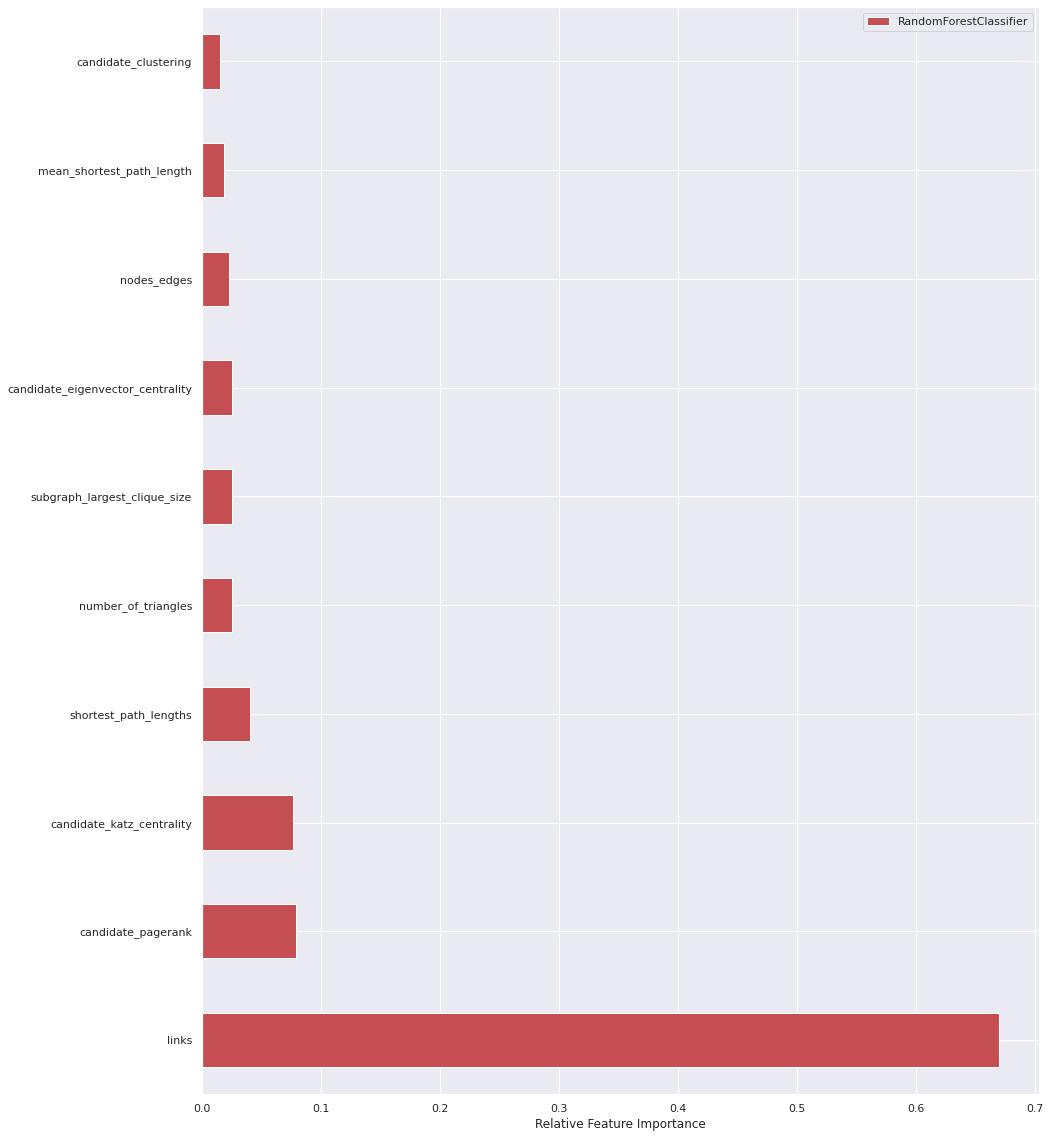

In [79]:
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(111)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33,random_state=314, shuffle=True, stratify=y_try)

feature_importances = pd.Series(clfs[1].feature_importances_, index=X_train.columns)
feature_importances.nlargest(X_train.shape[1]).plot(kind = 'barh', color = 'r', label = 'RandomForestClassifier')
plt.xlabel('Relative Feature Importance')
plt.legend()

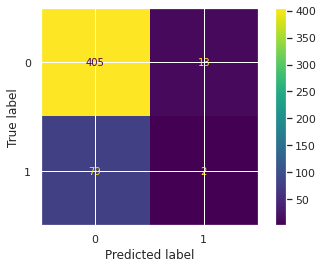

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[0], display_labels=clfs[0].classes_)
disp.plot()
plt.show()

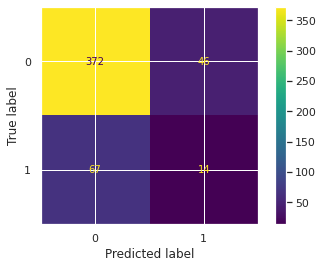

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[1], display_labels=clfs[1].classes_)
disp.plot()
plt.show()

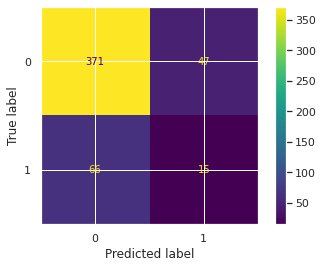

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[2], display_labels=clfs[2].classes_)
disp.plot()
plt.show()

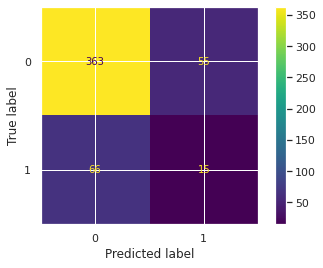

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[3], display_labels=clfs[3].classes_)
disp.plot()
plt.show()

/home/prateek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


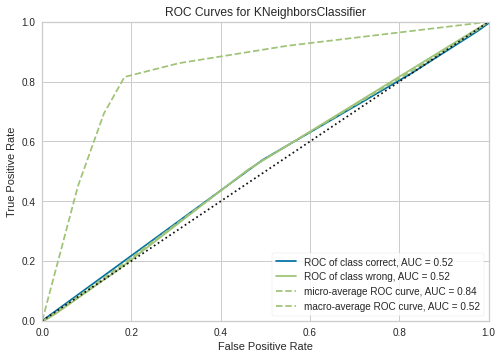

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [84]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clfs[0], classes=["correct", "wrong"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()